In [1]:
import numpy as np
import pandas as pd 
import os
import math
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer

In [2]:
train = pd.read_csv("C:/Users/user/OneDrive/Desktop/train.csv").set_index('PassengerId')
test = pd.read_csv("C:/Users/user/OneDrive/Desktop/test.csv").set_index('PassengerId')

y = train['Survived']
train = train.drop('Survived',axis=1)

display(train.head())
display(test.head())

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
X = pd.concat([train,test])
X.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,
1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
X.dtypes

Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
Embarked     object
dtype: object

In [5]:
X.describe()

,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,2.294882,29.881138,0.498854,0.385027,33.295479
std,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,2.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.275000
max,3.000000,80.000000,8.000000,9.000000,512.329200


In [6]:
#Pclass is actually categorical
X['Pclass'] = X['Pclass'].astype(object)

num_col = X.select_dtypes(include=['float64','int64']).columns
cat_col = X.select_dtypes(include=['object']).columns

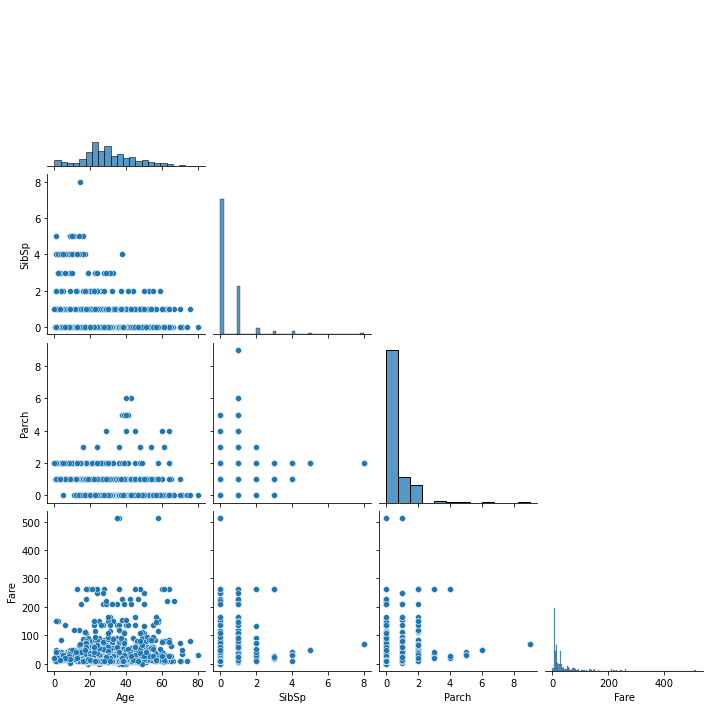

In [7]:
sns.pairplot(X[num_col],corner=True)

<AxesSubplot:>

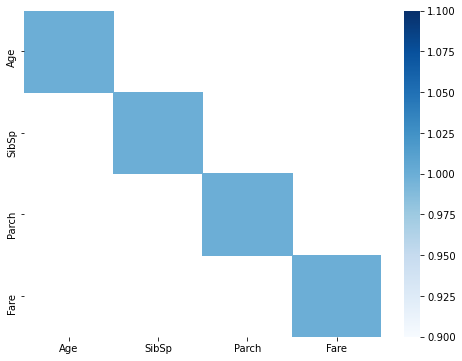

In [8]:
plt.figure(figsize=(8,6))
correlation = X[num_col].corr()
sns.heatmap(correlation, mask = correlation <0.4, cmap='Blues')

In [9]:
X[num_col].isnull().sum()

Age      263
SibSp      0
Parch      0
Fare       1
dtype: int64

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age Before Imputing')

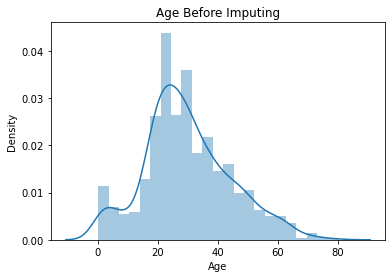

In [10]:
sns.distplot(X.Age).set_title("Age Before Imputing")

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age After Median Imputing')

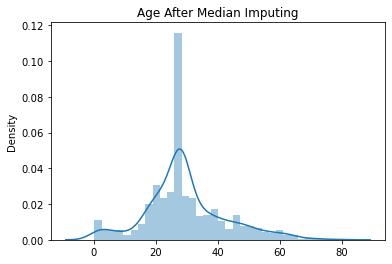

In [11]:
imputer = SimpleImputer(strategy='median')
imputed = imputer.fit_transform(X[['Age']])

sns.distplot(imputed).set_title("Age After Median Imputing")

In [12]:
def replace_with_random(a):
    """
    a: Value or NaN to be replaced
    
    Cannot set a random state as it would generate the same value each time this function
    is called. This is unlikely to be the derired behaviour
    """    
    
    from random import randint
        
    if pd.isnull(a):
        return randint(20,55)
    else:
        return a

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age After Random Imputing')

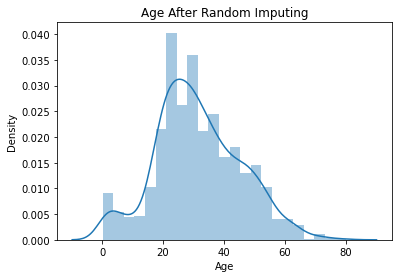

In [19]:
randimpute = X['Age'].apply(lambda a: replace_with_random(a))

sns.distplot(randimpute).set_title("Age After Random Imputing")

In [14]:
# For now I will use my random approach for Age
X['Age'] = randimpute

In [17]:
imputer = SimpleImputer(strategy='median')
X['Fare'] = imputer.fit_transform(X[['Fare']])

In [20]:
X[num_col].isnull().sum()

Age      0
SibSp    0
Parch    0
Fare     0
dtype: int64

In [21]:
X.describe()

,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000
mean,31.439015,0.498854,0.385027,33.281086
std,13.988080,1.041658,0.865560,51.741500
min,0.170000,0.000000,0.000000,0.000000
25%,22.000000,0.000000,0.000000,7.895800
50%,30.000000,0.000000,0.000000,14.454200
75%,41.000000,1.000000,0.000000,31.275000
max,80.000000,8.000000,9.000000,512.329200


In [22]:
cat_col = X.select_dtypes(include=['object']).columns
X[cat_col]

,Pclass,Name,Sex,Ticket,Cabin,Embarked
PassengerId,,,,,,
1,3,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
3,3,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
5,3,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,A.5. 3236,NaN,S
1306,1,"Oliva y Ocana, Dona. Fermina",female,PC 17758,C105,C
1307,3,"Saether, Mr. Simon Sivertsen",male,SOTON/O.Q. 3101262,NaN,S


In [23]:
X[cat_col].isnull().sum()

Pclass         0
Name           0
Sex            0
Ticket         0
Cabin       1014
Embarked       2
dtype: int64

<AxesSubplot:xlabel='Deck', ylabel='count'>

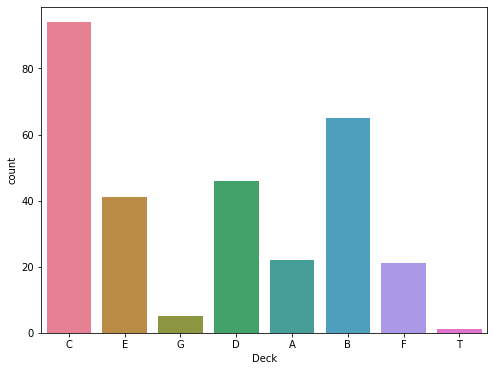

In [24]:
# Do something about cabin feature, at least extract deck where possible
plt.figure(figsize=(8,6))
X['Deck'] = X['Cabin'].str[0]
sns.countplot(x='Deck',data=X,palette="husl")

<AxesSubplot:xlabel='Deck', ylabel='Survived'>

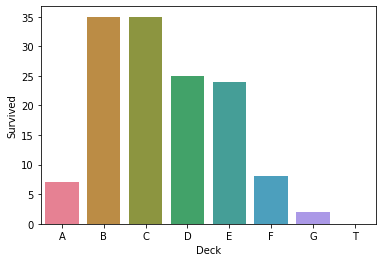

In [25]:
temp_data = pd.merge(X['Deck'],y,on='PassengerId')
temp_data = temp_data.groupby('Deck').sum()
sns.barplot(x=temp_data.index,y=temp_data['Survived'],palette='husl')

In [26]:
X = X.drop(['Cabin','Deck'],axis=1)

In [27]:
cat_col = X.select_dtypes(include=['object']).columns
X[cat_col].isnull().sum()

Pclass      0
Name        0
Sex         0
Ticket      0
Embarked    2
dtype: int64

In [28]:
X['Fare'] = X['Fare'][X['Fare']<400]

In [29]:
X['FamilySize'] = X['SibSp'] + X['Parch']
X = X.drop(['SibSp','Parch'],axis=1)

num_col = X.select_dtypes(include=['float64','int64']).columns

In [30]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant')),
    ('scaler',StandardScaler())
    ])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
    ])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_col),
        ('cat', categorical_transformer, cat_col)
    ])

In [31]:
# IMPORTANT: Now data is pre-processed, put it back into train and test sets and then split X and y.
test = X.loc[test.index]
X = X.loc[train.index]
y = y.loc[train.index]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.75,random_state=81)

In [32]:
# Import models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import Perceptron
from sklearn.ensemble import AdaBoostClassifier

In [33]:

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

parameters = {'model__n_estimators':[100,200,500],
              'model__min_samples_split':[2],
              'model__min_samples_leaf':[1]}

scorer = make_scorer(accuracy_score,greater_is_better=True)

grid = GridSearchCV(pipeline,parameters,scoring=scorer)

grid.fit(X_train,y_train)

y_pred = grid.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)

print("Accuracy:",accuracy)

#final_params = grid.best_params_



NameError: name 'pipeline' is not defined

In [34]:
#Train RF model model, I did a Grid Search CV on this, and it yielded the following setup of parameters:
RandomForest = RandomForestClassifier(n_estimators=500,
                                      min_samples_split=2,
                                      min_samples_leaf=1,
                                      random_state=81)

RF_pipeline = Pipeline(steps=[('preprocessor', preprocessor),('model', RandomForest)])

RF_pipeline.fit(X_train, y_train)

y_pred = RF_pipeline.predict(X_test)

RF_accuracy = accuracy_score(y_test,y_pred)

print("Accuracy:",RF_accuracy)

Accuracy: 0.8071748878923767


In [35]:
Perceptron = Perceptron()

Perc_pipeline = Pipeline(steps=[('preprocessor',preprocessor),('model',Perceptron)])

Perc_pipeline.fit(X_train,y_train)

y_pred = Perc_pipeline.predict(X_test)

Perceptron_accuracy = accuracy_score(y_test,y_pred)

print("Accuracy:",Perceptron_accuracy)

Accuracy: 0.7757847533632287


In [36]:
LogRegCV = LogisticRegressionCV(cv=5)

LR_pipeline = Pipeline(steps=[('preprocessor',preprocessor),('model',LogRegCV)])

LR_pipeline.fit(X_train,y_train)

y_pred = LR_pipeline.predict(X_test)

LogReg_accuracy = accuracy_score(y_test,y_pred)

print("Accuracy:",LogReg_accuracy)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7982062780269058


In [37]:
ADA = AdaBoostClassifier()

ADA_pipeline = Pipeline(steps=[('preprocessor',preprocessor),('model',ADA)])

ADA_pipeline.fit(X_train,y_train)

y_pred = ADA_pipeline.predict(X_test)

ADA_accuracy = accuracy_score(y_test,y_pred)

print("Accuracy:",ADA_accuracy)

Accuracy: 0.7757847533632287


In [38]:
%%time

from sklearn.ensemble import StackingClassifier

estimators = [('RF',RF_pipeline),
              ('Perceptron',Perc_pipeline),
              ('ADA',ADA_pipeline),
              ('LogReg',LR_pipeline)]

stack = StackingClassifier(estimators=estimators)
stack.fit(X_train,y_train)
y_pred = stack.predict(X_test)
stack_accuracy = accuracy_score(y_test,y_pred)
print("Accruacy:",stack_accuracy)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accruacy: 0.8026905829596412
Wall time: 11.3 s


In [39]:
results = pd.DataFrame({'Model':['Random Forest','Perceptron','Logistic Regression','ADA Boost','Stacked Model'],
                        'Accuracy':[RF_accuracy, Perceptron_accuracy,LogReg_accuracy,ADA_accuracy,stack_accuracy]}).set_index('Model')

In [41]:
results.sort_values('Accuracy',ascending=False)

,Accuracy
Model,
Random Forest,0.807175
Stacked Model,0.802691
Logistic Regression,0.798206
Perceptron,0.775785
ADA Boost,0.775785


In [43]:
#Choosing RF pipeline, seems best...
test_pred = RF_pipeline.predict(test)

submission = pd.DataFrame(test_pred,index=test.index,columns=['Survived'])

submission.to_csv("./submission.csv")